# LH-containing and NL Only Call UMAP
- project all calls that contain and LH segment or that only comprise a lone NL segment using UMAP 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

In [2]:
import avgn

In [3]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir, FIGURE_DIR
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.spectrogram import draw_spec_set
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig

In [4]:
DATASET_ID = "git_repos_call"

In [5]:
DT_ID = '2022-03-12_17-46-00'

In [6]:
call_df = pd.read_pickle(DATA_DIR / DATASET_ID / DT_ID /  'call_umap_grouped.pickle')
call_df[:3]

,start_time,end_time,labels,indv,indvi,filename,group,location,sex,wav_loc,...,comb_labels,umap,spectrogram,call_lab_simp,combi_lab_simp,call_unique_num,call_pos_combi,combi_label,combi_unique_num,simp
ID,,,,,,,,,,,,,,,,,,,,,
0,0.753604,0.921160,DSSHDS,MGGY,0,BWY MGGY Call Combo 1 290719 PM,BWYa,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,...,DSSHDS,"[5.7770762, 7.997407]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",DS-SH-DS,DS-SH-DS SH-LH,0,0,DSSHDS SHSHLH,0,Other Calls
1,0.932017,1.367130,SHSHLH,MGGY,0,BWY MGGY Call Combo 1 290719 PM,BWYa,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,...,SHSHLH,"[1.8122675, 5.094298]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",SH-LH,DS-SH-DS SH-LH,1,1,DSSHDS SHSHLH,0,Contains LH Segment
2,1.218085,1.308841,DS,MGGY,0,BWY MGGY Call Combo 1 300719 AM,BWYa,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,...,DS,"[9.353501, 10.055656]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",DS,DS SH-LH,2,0,DS USC,1,Other Calls


In [7]:
len(call_df)

561

In [8]:
#get rid of the column for umap on all calls as this is not needed here
call_df.drop(columns=['umap'], inplace=True)

## Other Calls (Not any with LH or that only contain a lone NL segment)

In [9]:
call_df.simp.unique()

array(['Other Calls', 'Contains LH Segment', 'NL Segment Alone'],
      dtype=object)

In [10]:
LHNLcall = ["Contains LH Segment", "NL Segment Alone"]

In [11]:
LHNLcall_df = call_df[call_df["simp"].isin(LHNLcall)]

In [12]:
LHNLcall_df[:3]

,start_time,end_time,labels,indv,indvi,filename,group,location,sex,wav_loc,...,rate,comb_labels,spectrogram,call_lab_simp,combi_lab_simp,call_unique_num,call_pos_combi,combi_label,combi_unique_num,simp
ID,,,,,,,,,,,,,,,,,,,,,
1,0.932017,1.367130,SHSHLH,MGGY,0,BWY MGGY Call Combo 1 290719 PM,BWYa,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,...,44100,SHSHLH,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",SH-LH,DS-SH-DS SH-LH,1,1,DSSHDS SHSHLH,0,Contains LH Segment
3,1.442686,1.984961,USC,MGGY,0,BWY MGGY Call Combo 1 300719 AM,BWYa,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,...,44100,USC,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",SH-LH,DS SH-LH,3,1,DS USC,1,Contains LH Segment
5,1.471596,1.897371,LH,MGGY,0,BWY MGGY Discrete 1 300719 AM,BWYa,CRAWLEY,F,C:/Users/slwal/anaconda3/envs/PY36/avgn_paper-...,...,44100,LH,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",LH,DS-SH-DS LH,5,1,DSSHDS LH,2,Contains LH Segment


In [13]:
len(LHNLcall_df)

229

BMYO 13


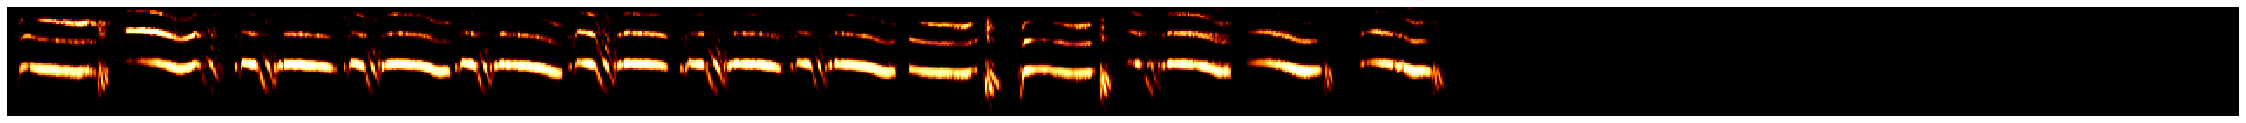

GBYM 16


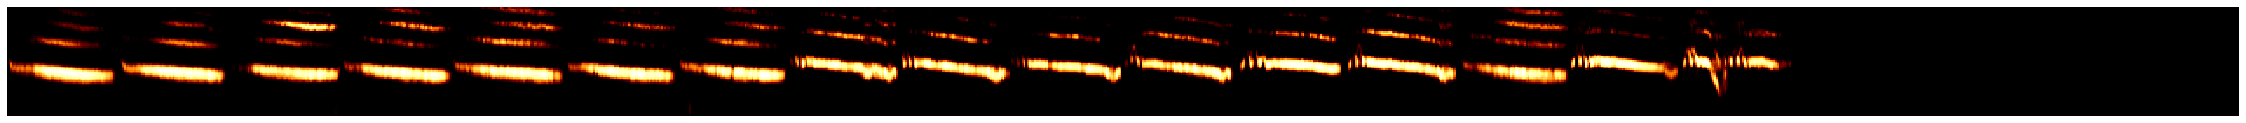

GON XF 19-21 6


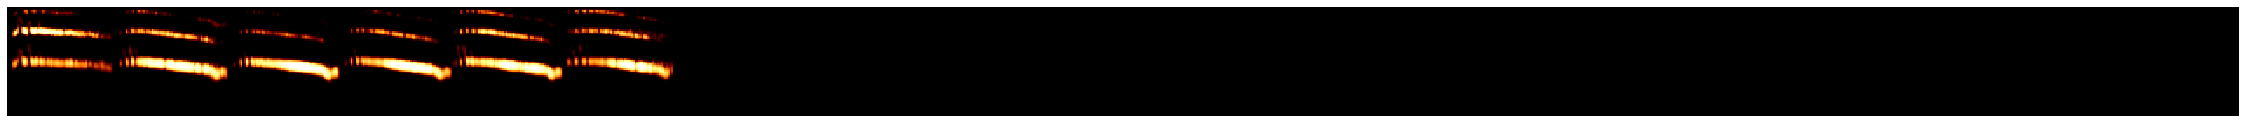

GON XM 20-21 1


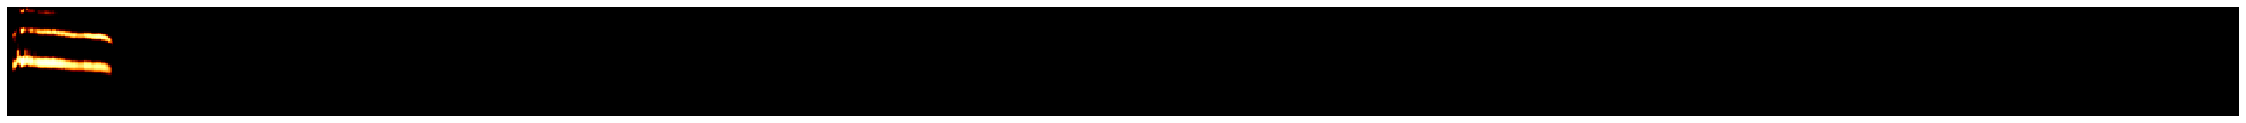

MGGY 11


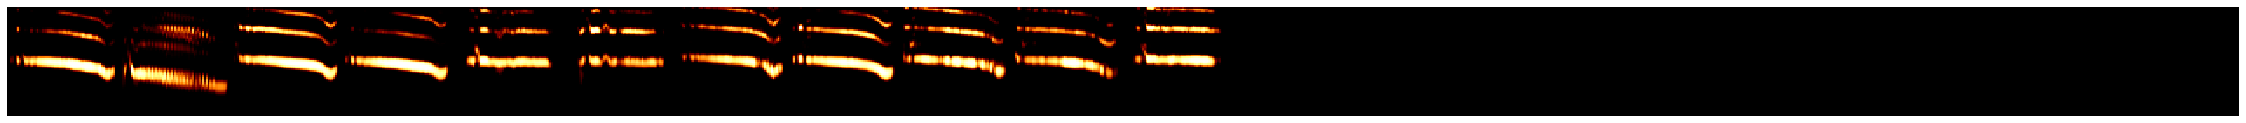

MOGO 9


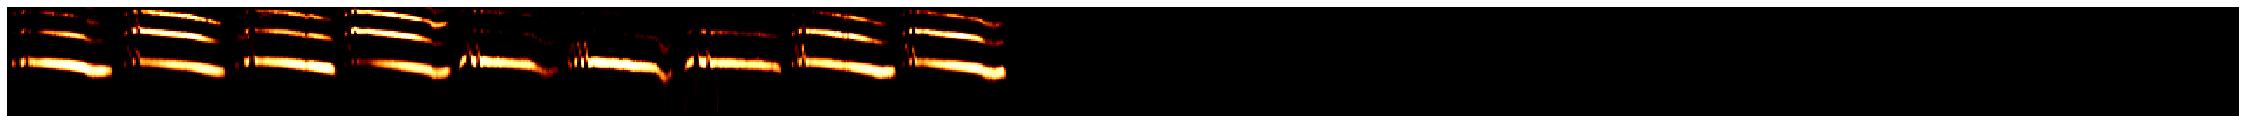

MOOO 6


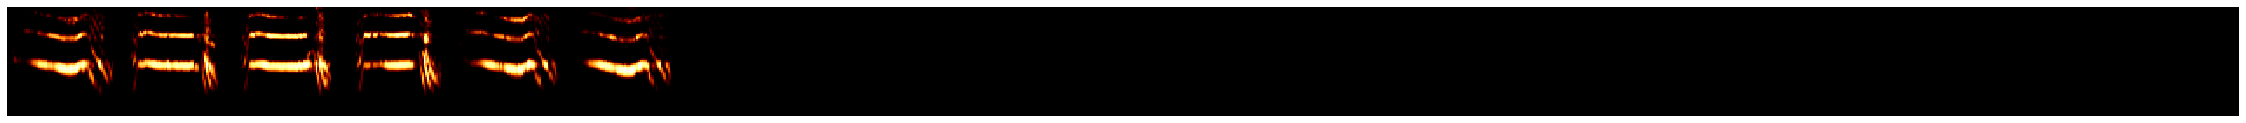

MORP 4


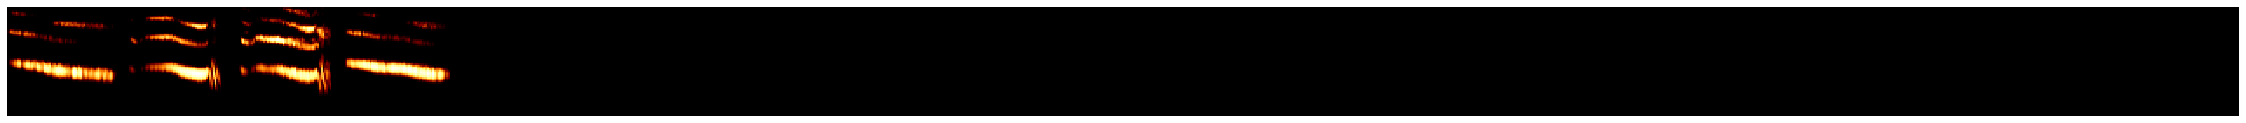

MOVY 5


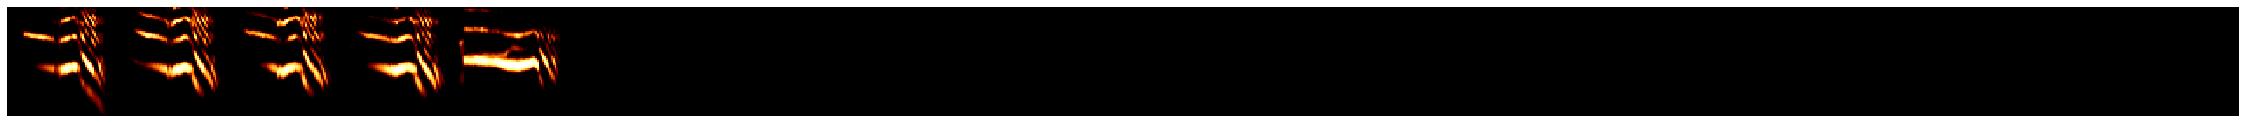

MRGO 12


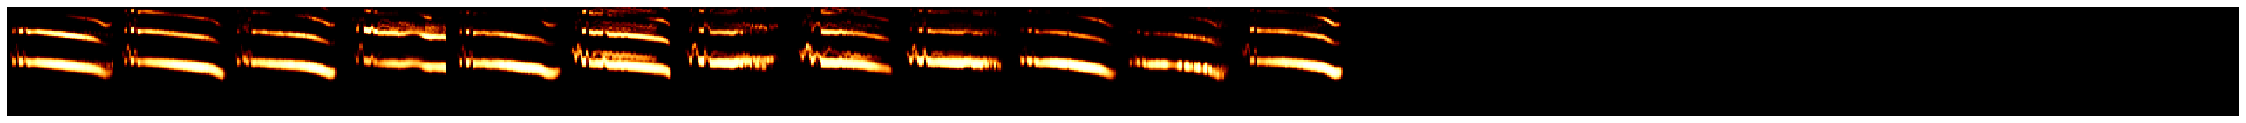

MXWW 5


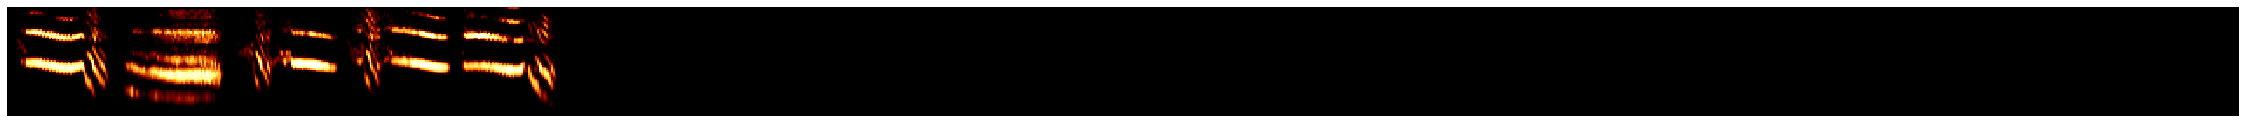

MXXBYX 1


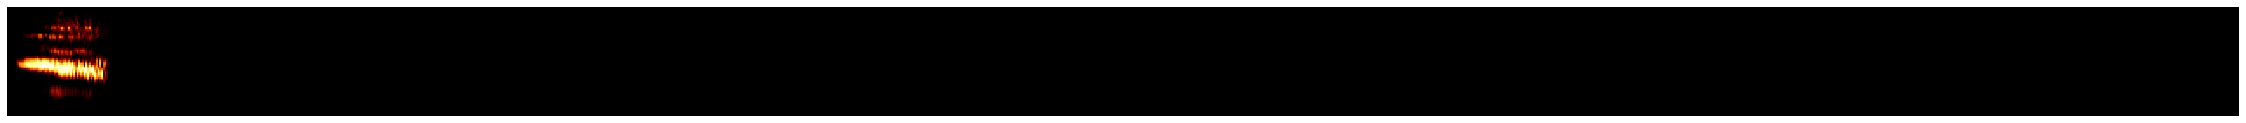

MXXGRY 18


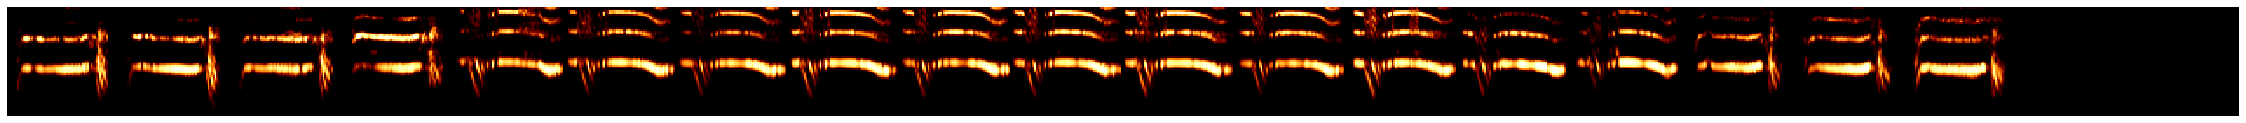

OMGO 21


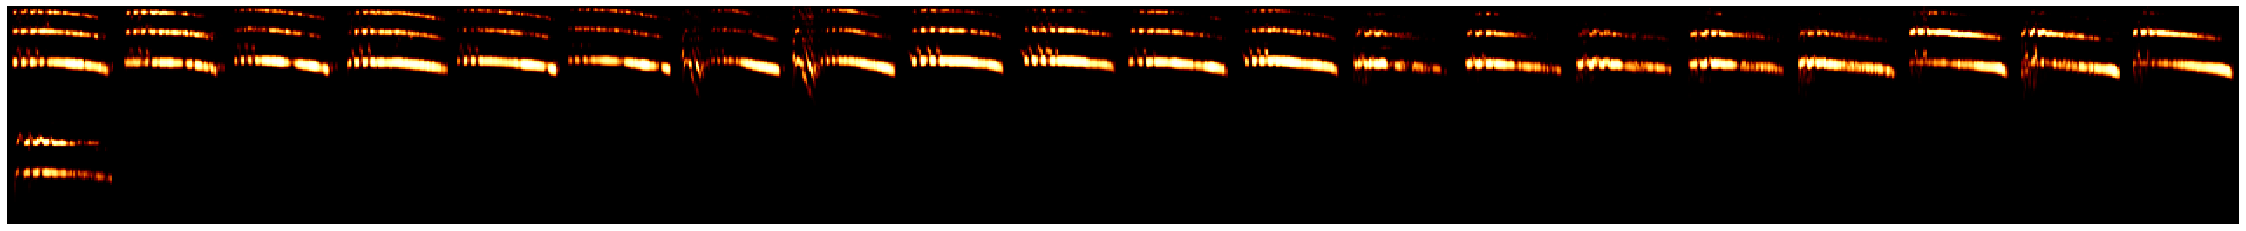

PMXRMX 3


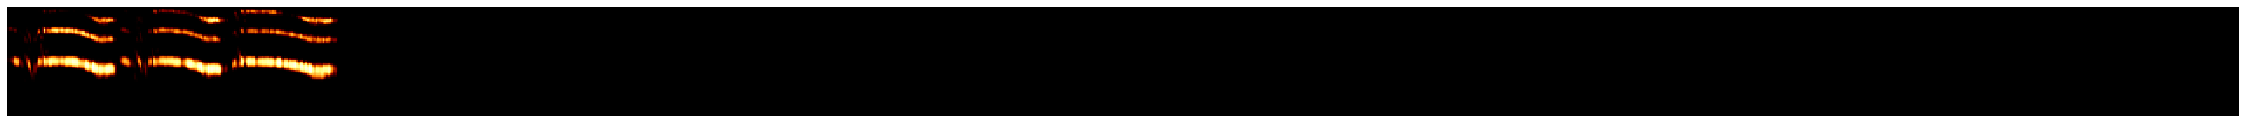

RMXGMX 14


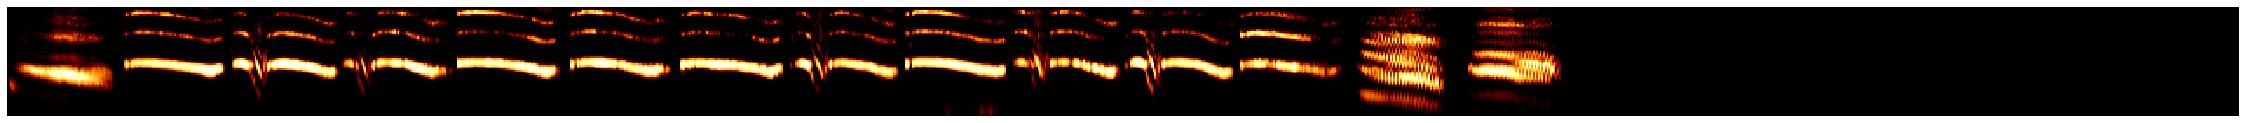

RMYG 9


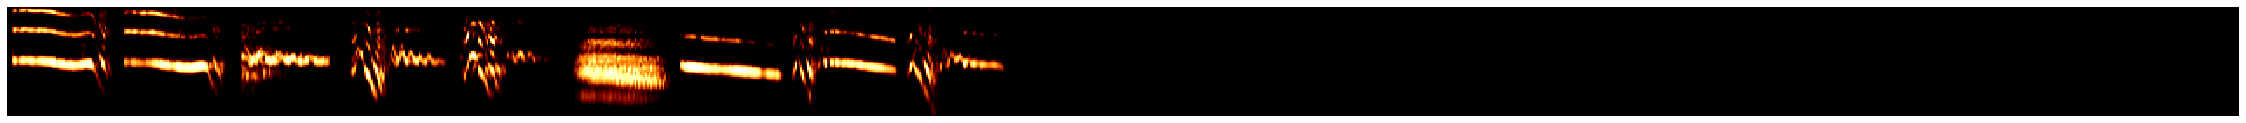

RYMR 3


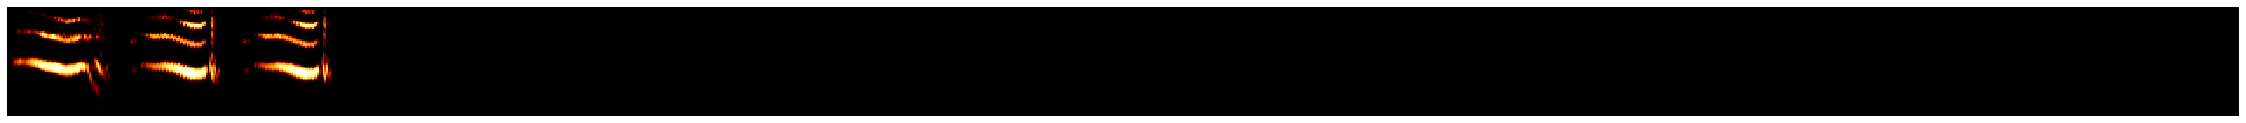

SCL XF 20-21 6


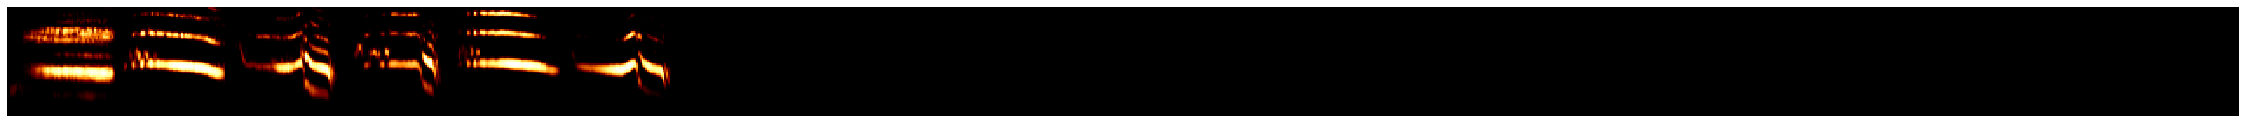

SCL XM 20-21 3


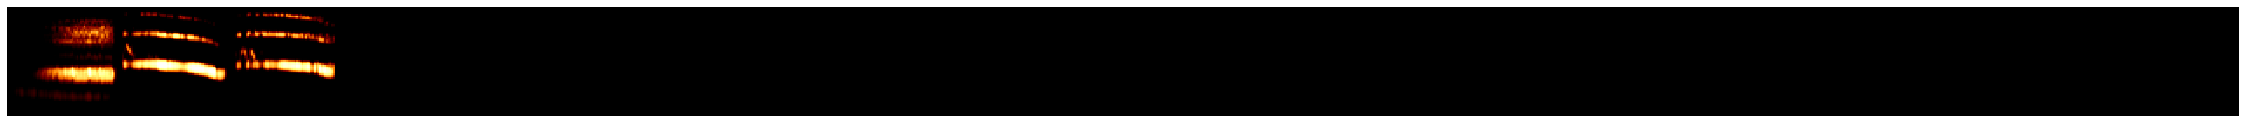

VVOM 15


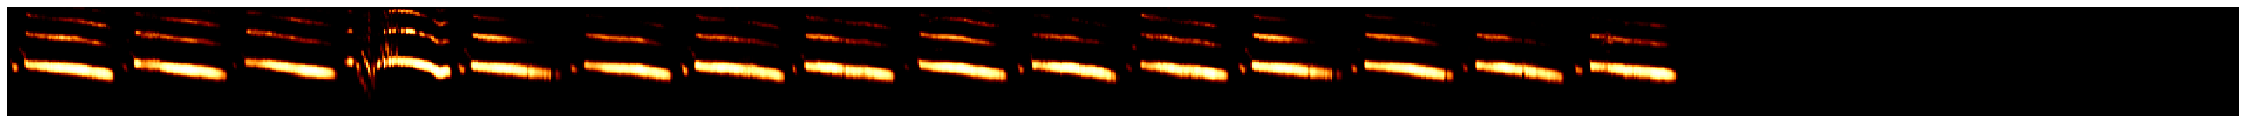

VVVM 42


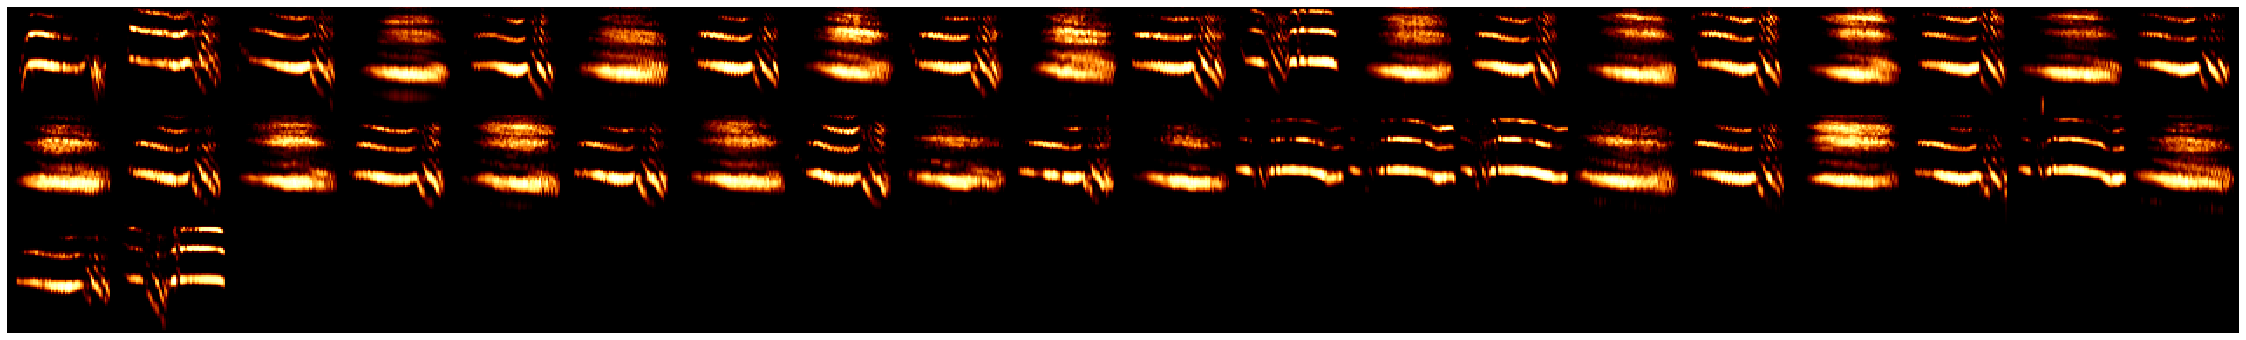

XF 20-21 6


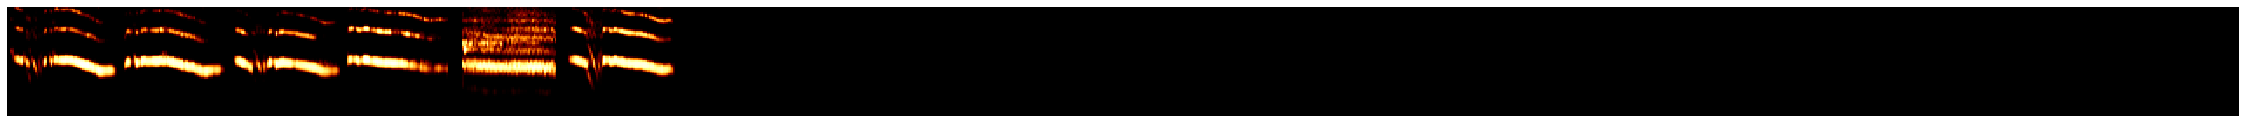

In [14]:
for indv in np.sort(LHNLcall_df.indv.unique()[:]):
    print(indv, np.sum(LHNLcall_df.indv == indv))
    specs = np.array([i/np.max(i) for i in LHNLcall_df[LHNLcall_df.indv == indv].spectrogram.values])
    specs[specs<0] = 0
    draw_spec_set(specs, zoom=2,
                  maxrows=8, 
                  colsize=20)
    plt.show()

In [15]:
LHNLcall_df = LHNLcall_df[np.array([np.sum(i) > 0.0 for i in LHNLcall_df.spectrogram.values])]

In [16]:
def norm(x):
    return (x-np.min(x)) / (np.max(x) - np.min(x))

In [17]:
specs = list(LHNLcall_df.spectrogram.values)
specs = [norm(i) for i in tqdm(specs)]
specs_flattened = flatten_spectrograms(specs)
np.shape(specs_flattened)

  0%|          | 0/229 [00:00<?, ?it/s]

(229, 4096)

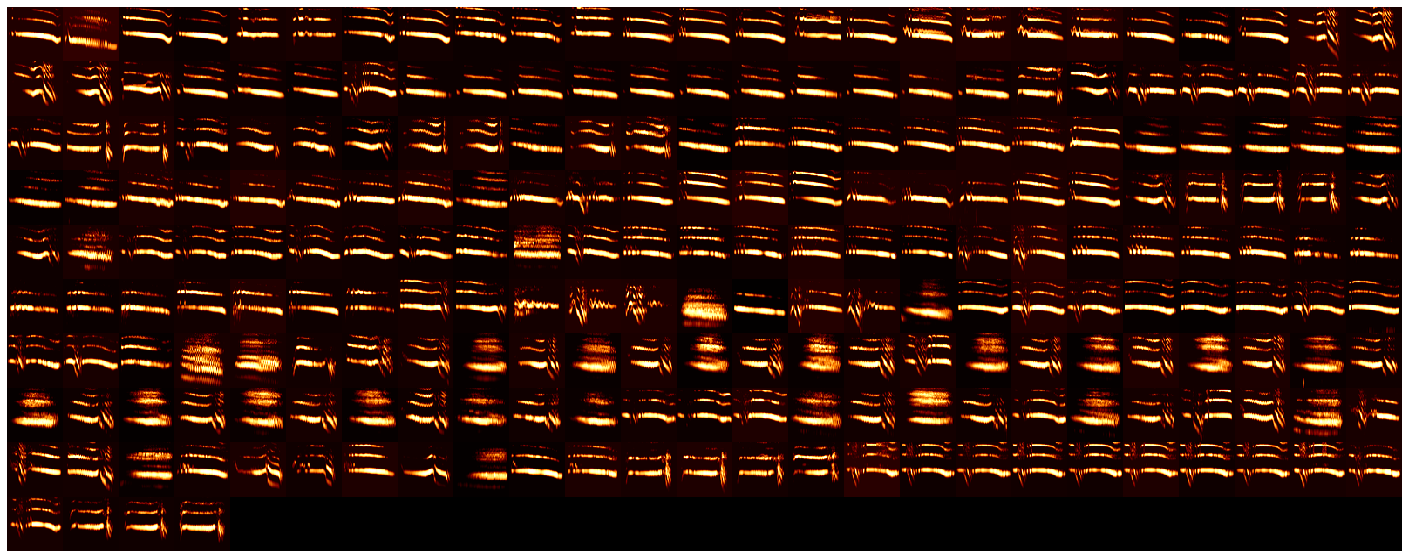

In [18]:
draw_spec_set(specs, zoom=1, maxrows=10, colsize=25)

In [19]:
fit = umap.UMAP(min_dist=0.0, verbose = True)
z = list(fit.fit_transform(specs_flattened))

UMAP(min_dist=0.0, verbose=True)
Construct fuzzy simplicial set
Tue Sep 13 13:42:36 2022 Finding Nearest Neighbors
Tue Sep 13 13:42:37 2022 Finished Nearest Neighbor Search
Tue Sep 13 13:42:39 2022 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Sep 13 13:42:40 2022 Finished embedding


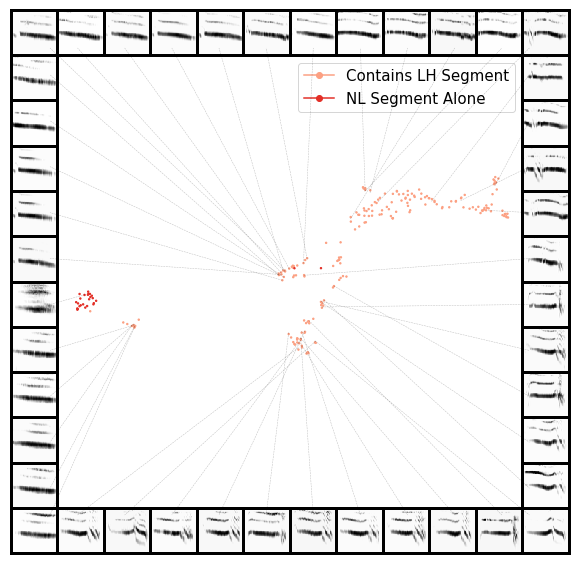

In [27]:
nex = -1
scatter_spec(
    z,
    specs,
    column_size=12,
    x_range = [-1.75,15.75],
    y_range = [-2.25,15.25],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(10, 10),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': LHNLcall_df.simp.values,
        'alpha':1,
        's': 2,
        'show_legend': True,
        "color_palette": 'Reds',
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':0.5,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,
    

);


Most LH calls cluster away from the NL segment only calls, thus it appears these groups of calls are distinct.

In [28]:
LHNLcall_df['umap'] = list(z)

### Export to pickle

In [30]:
#save df
save_loc = DATA_DIR / DATASET_ID / "LHNL_calls" /  'LHNLcall_UMAP.pickle'
ensure_dir(save_loc.as_posix())
LHNLcall_df.to_pickle(save_loc)